### Importing The Libraries 

In [6]:
#pip install imbalanced-learn

In [7]:
#pip install category_encoders

In [8]:
# Packages for EDA 
#==============================================
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go

# Data Preprocessing
#==============================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2, SelectFromModel, VarianceThreshold, RFE
import category_encoders as ce
import re 
from sklearn.impute import KNNImputer
# Modeling and evaluation 
#==============================================
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
import joblib
# Packages options 
#==============================================
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure 
#size for all 
#==============================================
np.seterr(divide='ignore', invalid='ignore', over='ignore') 
#Warnings
#==============================================
import warnings 
warnings.filterwarnings("ignore")

### Read The Data 

In [9]:
df = pd.read_csv("train.csv",low_memory=False)
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Prelimininary Data Univariate Inspection

In [10]:
df.shape

(100000, 28)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [12]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


### The info gave that there are multiple missing values in the data

In [13]:
df.duplicated().sum()

0

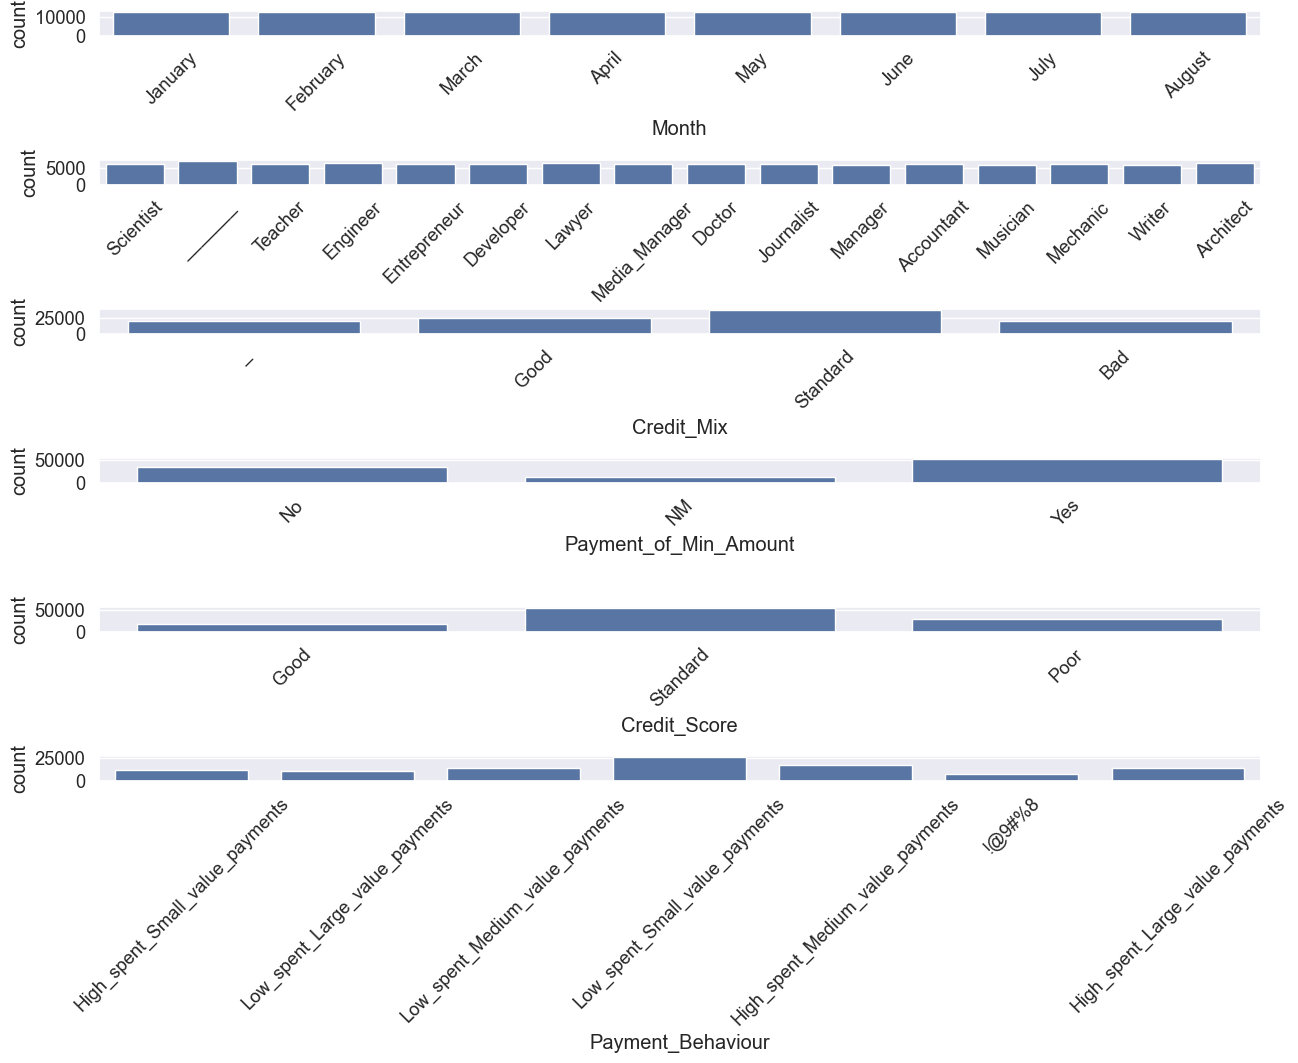

In [14]:
fig, axis = plt.subplots(nrows=6, ncols=1, figsize=(15,10))
fig.subplots_adjust(hspace=5)

sns.countplot(x=df["Month"], ax=axis[0])
axis[0].tick_params(axis='x', rotation=45)

sns.countplot(x=df["Occupation"], ax=axis[1])
axis[1].tick_params(axis='x', rotation=45)

sns.countplot(x=df["Credit_Mix"], ax=axis[2])
axis[2].tick_params(axis='x', rotation=45)

sns.countplot(x=df["Payment_of_Min_Amount"], ax=axis[3])
axis[3].tick_params(axis='x', rotation=45)

sns.countplot(x=df["Credit_Score"], ax=axis[4])
axis[4].tick_params(axis='x', rotation=45)

sns.countplot(x=df["Payment_Behaviour"], ax=axis[5])
axis[5].tick_params(axis='x', rotation=45)

plt.show()

### Data Preprocessing¶

##### We will have do data preprocessing for the following issues in the dataset

**1.** The columns ID, Cust_ID, SSN, Name are not useful are the categorization

 **Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt, Credit_Mix, Monthly_Balance Numerical but show as catogery (need to be fixed)**
 

**3.** Missing entries

In [15]:
df.drop(["ID","Name","SSN"],axis=1, inplace=True)

In [16]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Handling Numerical variables

In [17]:
N_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 
            'Changed_Credit_Limit','Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

In [18]:
for i in N_to_fix:
    df[i] = pd.to_numeric(df[i], errors='coerce').fillna(0).astype(float)

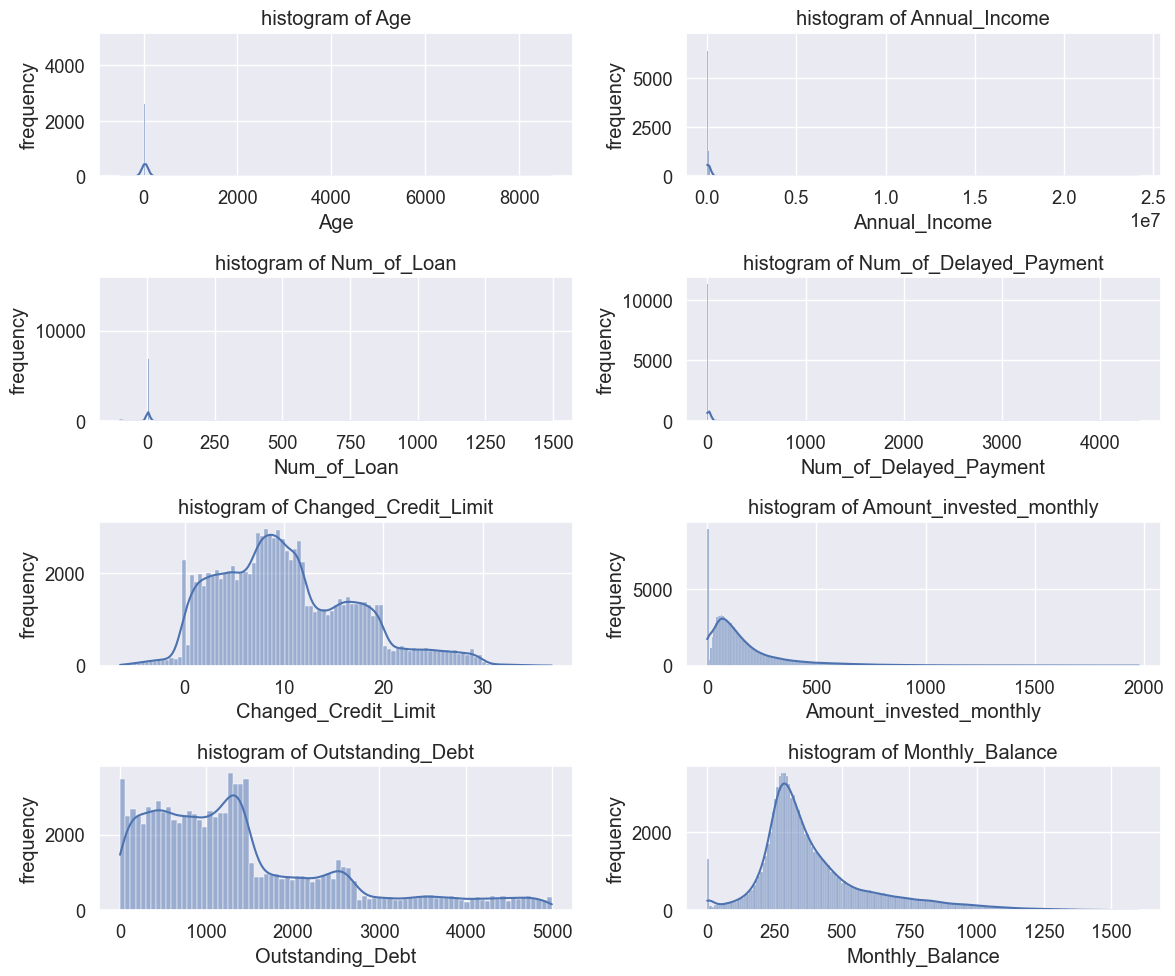

In [19]:
fig,axis=plt.subplots(nrows=4,ncols=2,figsize=(12,10))
k=axis.flatten()
for i,p in zip(N_to_fix,k):
    sns.histplot(x=df[i],ax=p,kde=True)
    p.set_title(f"histogram of {i}")
    p.set_xlabel(i)
    p.set_ylabel("frequency")
plt.tight_layout()
plt.show()

In [20]:
for i in df["Type_of_Loan"].value_counts().head(9).index[1:]:
    df[i] = df["Type_of_Loan"].fillna('').str.contains(i).astype(int)
del df["Type_of_Loan"]

In [21]:
df.head(5)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,312.494089,Good,1,1,0,0,0,0,1,1
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,284.629162,Good,1,1,0,0,0,0,1,1
2,CUS_0xd40,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,331.209863,Good,1,1,0,0,0,0,1,1
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,223.451310,Good,1,1,0,0,0,0,1,1
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,341.489231,Good,1,1,0,0,0,0,1,1


### Handling wrong entries

In [22]:
df['Num_Bank_Accounts']= df['Num_Bank_Accounts'].abs()

In [23]:
df["Num_Credit_Card"].replace(0,1,inplace=True)

In [24]:
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}

In [25]:
df['Credit_Mix'] = df['Credit_Mix'].map(m)

In [26]:
def parse_years_and_months(arg):
    if isinstance(arg,str):
        age_parts=arg.split("Years and")
        years=int(age_parts[0]) if "Years" in arg else 0
        months_parts=age_parts[1].split("Months")[0] if "Months" in arg else 0
        months=int(months_parts)
        age=years*12 + months
        return age
    else:
        return 0

In [27]:
df["Credit_History_Age"] = df["Credit_History_Age"].apply(parse_years_and_months)

In [28]:
df['Credit_History_Age'].head()

0    265
1      0
2    267
3    268
4    269
Name: Credit_History_Age, dtype: int64

In [29]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,312.494089,Good,1,1,0,0,0,0,1,1
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,284.629162,Good,1,1,0,0,0,0,1,1
2,CUS_0xd40,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,331.209863,Good,1,1,0,0,0,0,1,1
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,223.451310,Good,1,1,0,0,0,0,1,1
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,341.489231,Good,1,1,0,0,0,0,1,1


## Handling Missing Data in Numericals

In [30]:
df["Customer_ID"].value_counts()

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64

In [31]:
df["Customer_ID"] = pd.factorize(df["Customer_ID"])[0] + 1

In [32]:
Numericals = df.select_dtypes(exclude='object').columns[1:]
Numericals

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [33]:
impute=KNNImputer(n_neighbors=1)

In [34]:
df[Numericals] = df.groupby('Customer_ID')[Numericals].transform(lambda x: impute.fit_transform(x.values.reshape(-1, 1)).flatten())

In [35]:
df[Numericals].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  float64
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

## Data Preprocessing the Categorical Columns

In [36]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [37]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8",np.NaN)

In [38]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

In [39]:
imputer=SimpleImputer(strategy="most_frequent")
df[["Payment_Behaviour"]]=imputer.fit_transform(df[["Payment_Behaviour"]])

In [40]:
df["Payment_Behaviour"].count()

100000

In [41]:
categorical = df.select_dtypes(include=object)
categorical

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,No,High_spent_Small_value_payments,Good
1,February,Scientist,No,Low_spent_Large_value_payments,Good
2,March,Scientist,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,No,Low_spent_Small_value_payments,Good
4,May,Scientist,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,April,Mechanic,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,No,High_spent_Large_value_payments,Poor
99998,July,Mechanic,No,Low_spent_Large_value_payments,Standard


In [42]:
Occupation=df["Occupation"].value_counts().index[1:]
for i in Occupation:
    df[i]=df["Occupation"].str.contains(i)
del df["Occupation"]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

In [44]:
df = pd.get_dummies(df.drop(["Credit_Score"],axis=1),drop_first=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Customer_ID                                         100000 non-null  int64  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  float64
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  float64
 8   Delay_from_due_date                                 100000 non-nu

In [46]:
df.drop(["Payment_of_Min_Amount_No"],axis=1, inplace=True)

In [47]:
df_credit_score = pd.read_csv("train.csv",low_memory=False)

In [48]:
m={"Poor":0, "Standard":1, "Good":2}
df_credit_score["Credit_Score"]=df_credit_score["Credit_Score"].map(m)

In [49]:
X, y = df , df_credit_score["Credit_Score"] 

In [50]:
X.astype(float)
y.astype(float)

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    1.0
99999    0.0
Name: Credit_Score, Length: 100000, dtype: float64

In [51]:
scalar= PowerTransformer(method="yeo-johnson", standardize=True)
scalar.fit_transform(X)

array([[-2.18876414, -0.06515282, -0.25964914, ..., -0.34114941,
        -0.40114129, -0.70360417],
       [-2.18876414, -0.06515282, -0.25964914, ...,  2.93126699,
        -0.40114129, -0.70360417],
       [-2.18876414, -6.13941805, -0.25964914, ..., -0.34114941,
         2.49288722, -0.70360417],
       ...,
       [ 1.55424557, -0.05982162,  0.13583172, ..., -0.34114941,
        -0.40114129, -0.70360417],
       [ 1.55424557, -0.05982162,  0.13583172, ...,  2.93126699,
        -0.40114129, -0.70360417],
       [ 1.55424557, -0.05982162, -2.59680201, ..., -0.34114941,
        -0.40114129,  1.42125365]])

In [52]:
class FeatureSelector:
    def __init__(self, method='select_k_best', k=10, estimator=None):
        self.method = method
        self.k = k
        self.estimator = estimator
        self.selected_feature_indices = None
        
        if self.method == 'select_k_best':
            self.selector = SelectKBest(score_func=f_classif, k=self.k)
        elif self.method == 'mutual_info':
            self.selector = SelectKBest(score_func=mutual_info_classif, k=self.k)
        elif self.method == 'chi2':
            self.selector = SelectKBest(score_func=chi2, k=self.k)
        elif self.method == 'select_from_model':
            if self.estimator is None:
                raise ValueError("Estimator must be provided for 'select_from_model' method.")
            self.selector = SelectFromModel(estimator=self.estimator)
        elif self.method == 'variance_threshold':
            self.selector = VarianceThreshold()
        elif self.method == 'recursive_feature_elimination':
            if self.estimator is None:
                raise ValueError("Estimator must be provided for 'recursive_feature_elimination' method.")
            self.selector = RFE(estimator=self.estimator, n_features_to_select=self.k)
        else:
            raise ValueError("Invalid feature selection method. Supported methods are 'select_k_best', 'mutual_info', 'chi2', 'select_from_model', 'variance_threshold', and 'recursive_feature_elimination'.")
    
    def fit_transform(self, X, y, feature_names=None):
        X_new = self.selector.fit_transform(X, y)
        if feature_names is not None:
            self.selected_feature_indices = self.selector.get_support(indices=True)
            selected_feature_names = [feature_names[i] for i in self.selected_feature_indices]
            return X_new, selected_feature_names
        return X_new
    
    def get_support(self):
        return self.selector.get_support()
    
    def set_params(self, **params):
        self.selector.set_params(**params)
        
    def get_params(self, deep=True):
        return self.selector.get_params(deep)


In [53]:

methods = ['select_k_best', 'mutual_info', 'chi2', 'select_from_model', 'variance_threshold', 'recursive_feature_elimination']
X=df
y=df_credit_score["Credit_Score"] 
selected_features2=[]
print("Available feature selection methods:")
for i, method in enumerate(methods):
    print(f"{i + 1}. {method}")

choice = int(input("Enter the number corresponding to the method you want to use: "))
if choice < 1 or choice > len(methods):
    print("Invalid choice.")
else:
    chosen_method = methods[choice - 1]
    print(f"\nUsing {chosen_method} method:")
    
    # Perform feature selection
    if chosen_method in ['select_from_model', 'recursive_feature_elimination']:
        selector = FeatureSelector(method=chosen_method, k=7, estimator=RandomForestClassifier())
    else:
        selector = FeatureSelector(method=chosen_method, k=7)
    selected_features, selected_feature_names = selector.fit_transform(X, y, feature_names=X.columns)
    selected_features2.append(selected_feature_names)
    
    print("Selected Features:")
    print(selected_features)
    print("Selected Feature Names:")
    print(selected_feature_names)

Available feature selection methods:
1. select_k_best
2. mutual_info
3. chi2
4. select_from_model
5. variance_threshold
6. recursive_feature_elimination

Using recursive_feature_elimination method:
Selected Features:
[[1.82484333e+03 3.00000000e+00 1.12700000e+01 ... 8.09980000e+02
  2.65000000e+02 3.12494089e+02]
 [1.82484333e+03 3.00000000e+00 1.12700000e+01 ... 8.09980000e+02
  0.00000000e+00 2.84629162e+02]
 [1.82484333e+03 3.00000000e+00 0.00000000e+00 ... 8.09980000e+02
  2.67000000e+02 3.31209863e+02]
 ...
 [3.35941583e+03 5.72900000e+03 1.15000000e+01 ... 5.02380000e+02
  3.80000000e+02 5.16809083e+02]
 [3.35941583e+03 7.00000000e+00 1.15000000e+01 ... 5.02380000e+02
  3.81000000e+02 3.19164979e+02]
 [3.35941583e+03 7.00000000e+00 1.15000000e+01 ... 5.02380000e+02
  3.82000000e+02 3.93673696e+02]]
Selected Feature Names:
['Monthly_Inhand_Salary', 'Interest_Rate', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Monthly_Balance']


In [56]:
X_train,X_test,y_train,y_test = train_test_split(selected_features,y,test_size=0.3,random_state=42)

In [58]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, 
                             max_features='sqrt', bootstrap=True, 
                             random_state=42, class_weight=None)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest:", accuracy_rf)

Accuracy of Random Forest: 0.7796


In [59]:
xgb_model = XGBClassifier(n_estimators=3500, random_state=77)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of xgb:", accuracy_xgb)

Accuracy of xgb: 0.7683


In [60]:
accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

models = ['RandomForestClassifier', 'XGBoostClassifier']
accuracy_values = [accuracy_rf, accuracy_xgb]
colors = ['blue', 'green']

fig = go.Figure(data=[go.Bar(x=models, y=accuracy_values, marker_color=colors)])
fig.update_layout(
    title='Comparison of accuracy between RandomForestClassifier and XGBoostClassifier',
    xaxis_title='Models',
    yaxis_title='Accuracy'
)
fig.show()

In [ ]:
importances = xgb_model.feature_importances_

top_indices = importances.argsort()[-5:][::-1]
top_features = X_train.columns[top_indices]

print("Top 5 features:")
for feature in top_features:
    print(feature)

Top 5 features:
Credit_Mix
Outstanding_Debt
Month_February
Month_January
Month_March


In [ ]:
df[['Credit_Mix','Outstanding_Debt','Month_February','Month_January','Month_March']]

,Credit_Mix,Outstanding_Debt,Month_February,Month_January,Month_March
0,2.0,809.98,False,True,False
1,2.0,809.98,True,False,False
2,2.0,809.98,False,False,True
3,2.0,809.98,False,False,False
4,2.0,809.98,False,False,False
...,...,...,...,...,...
99995,2.0,502.38,False,False,False
99996,2.0,502.38,False,False,False
99997,2.0,502.38,False,False,False
99998,2.0,502.38,False,False,False


In [ ]:
importances = clf.feature_importances_

top_indices = importances.argsort()[-5:][::-1]
top_features = X_train.columns[top_indices]

print("Top 5 features:")
for feature in top_features:
    print(feature)

Top 5 features:
Outstanding_Debt
Credit_Mix
Interest_Rate
Delay_from_due_date
Changed_Credit_Limit


In [61]:
import pickle 
pickle.dump(clf, open("RandomForest.pkl","wb"))